# **Reconocimiento de Señales de Tráfico con Redes Neuronales Convolucionales (CNN)**

El reconocimiento de señales de tráfico desempeña un papel crucial en la seguridad vial y la conducción autónoma. Con el avance de la tecnología de visión por computadora y el aprendizaje profundo, las redes neuronales convolucionales (CNN) han demostrado ser herramientas poderosas en la clasificación precisa de señales de tráfico.

![Intro](https://github.com/DLCBA/CNN/raw/main/recursos/Intro_n.png)

## Objetivo:

El objetivo principal de este proyecto es desarrollar un modelo de reconocimiento de señales de tráfico utilizando una CNN. Se busca crear un sistema capaz de identificar y clasificar una amplia variedad de señales de tráfico en tiempo real, lo que permitirá **mejorar la seguridad vial** y contribuir al desarrollo de vehículos autónomos más seguros.






![Inputs](https://github.com/DLCBA/CNN/blob/main/recursos/Inputs.png?raw=true)

# **IMPORTACION DE LIBRERIAS**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import requests
import random

# **IMPORTACIÓN DEL DATASET**

Se utilizará un conjunto de datos amplio y diverso que contenga imágenes de señales de tráfico en diferentes condiciones de iluminación, clima y perspectivas. La red neuronal convolucional, es especialmente efectiva en tareas de clasificación de imágenes. Además, se emplearán técnicas de preprocesamiento de imágenes para mejorar la calidad de los datos y aumentar la precisión del modelo.

In [ ]:
train_url = "https://github.com/DLCBA/CNN/raw/4ed4c29482ffa3973574f59a2b66c4a7e32abb5a/data.signs/train.p"
valid_url = "https://github.com/DLCBA/CNN/raw/4ed4c29482ffa3973574f59a2b66c4a7e32abb5a/data.signs/valid.p"
test_url = "https://github.com/DLCBA/CNN/raw/4ed4c29482ffa3973574f59a2b66c4a7e32abb5a/data.signs/test.p"

In [ ]:
train_response = requests.get(train_url)
valid_response = requests.get(valid_url)
test_response = requests.get(test_url)

train = pickle.loads(train_response.content)
valid = pickle.loads(valid_response.content)
test = pickle.loads(test_response.content)

Como se puede observar, los datos que hemos traido para utilizar, corresponden a 3 archivos pickle que conforman el dataset, la división presentada del dataset original es de:

*   **60% Entrenamiento**
*   **20% Validación**
*   **20% Test**


# **SPLIT DE DATOS**

Dividimos en conjuntos de entrenamiento, validación y prueba de forma manual, para evaluar su rendimiento de manera rigurosa.

In [ ]:
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [ ]:
X_train.shape

(34799, 32, 32, 3)

In [ ]:
y_train.shape

(34799,)

# **VISUALIZACION DE IMAGENES**

Aunque no parezca algo fundamental, siempre debemos visualizar las imagenes a utilizar en el proyecto por varias razones:

- **Calidad de los Datos**
- **Diversidad de Clases**
- **Equilibrio de Clases**
- **Exploracion de caracteristicas**
- **Preprocesamiento**

Por lo tanto, revisar y visualizar el conjunto de datos de imágenes es una etapa crítica en el proceso de desarrollo de un modelo CNN, ya que te permite asegurarte de que los datos sean adecuados y estén preparados de manera óptima previo al entrenamiento del modelo.

13

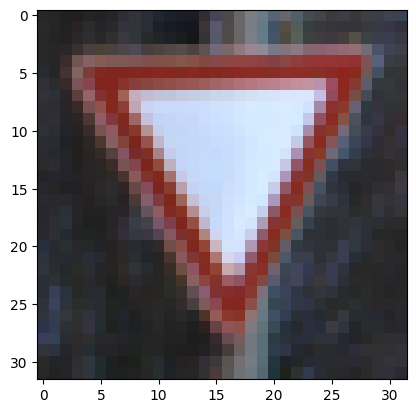

In [ ]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

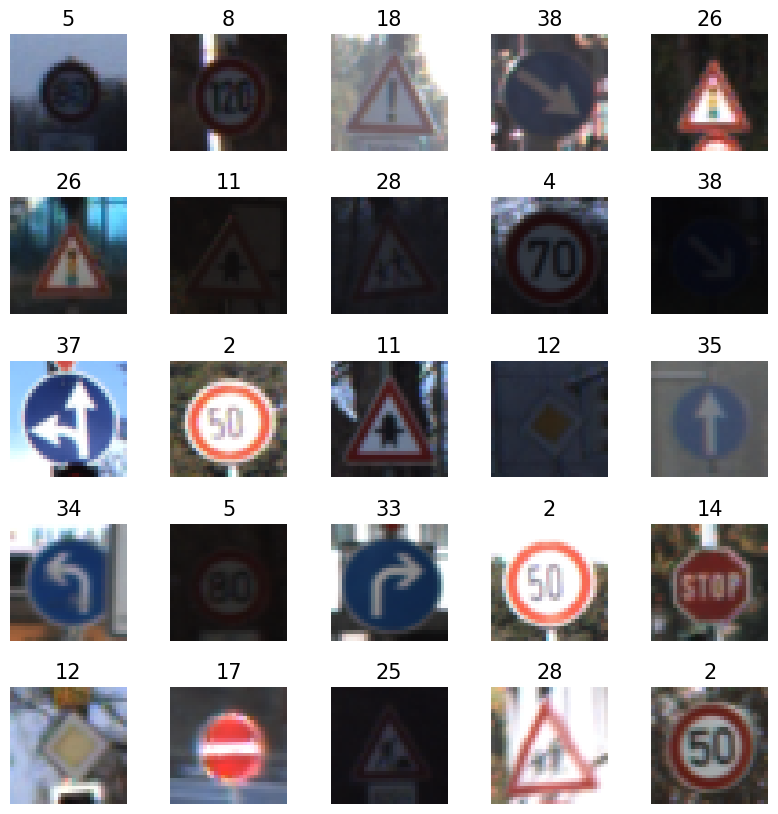

In [ ]:
# Creamos una grilla para la visualización de imagenes
ANCHO_grilla = 5
LARGO_grilla = 5

fig, axes = plt.subplots(LARGO_grilla, ANCHO_grilla, figsize = (10,10))

axes = axes.ravel() # Convertimos la grilla en un array de 25

n_training = len(X_train)

for i in np.arange(0, ANCHO_grilla * LARGO_grilla):
    index= np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize= 15)
    axes[i].axis('off')

plt.subplots_adjust(hspace= 0.4)

# **PREPROCESAMIENTO Y NORMALIZACION**

Realizamos una mezcla de los datos de entrenamiento para luego realizar la conversión de las imagenes de RGB a escala de grises. Por ultimo realizamos una normalización simple de los pixeles de las imagenes, restando 128 de cada valor de pixel y diviendo el resultado por 128, llevando así los valores de pixeles a estar entre -1 y 1.

In [ ]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [ ]:
X_train_gray = np.sum(X_train/3, axis= 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis= 3, keepdims = True)
X_valid_gray = np.sum(X_valid/3, axis= 3, keepdims = True)

In [ ]:
X_train_gray.shape

(34799, 32, 32, 1)

In [ ]:
X_train_gray_norm= (X_train_gray - 128)/128
X_test_gray_norm= (X_test_gray - 128)/128
X_valid_gray_norm= (X_valid_gray - 128)/128

In [ ]:
X_train_gray_norm

array([[[[ 0.05989583],
         [ 0.07552083],
         [ 0.09114583],
         ...,
         [ 0.26822917],
         [ 0.24479167],
         [ 0.2265625 ]],

        [[ 0.05208333],
         [ 0.06770833],
         [ 0.07552083],
         ...,
         [ 0.26822917],
         [ 0.22916667],
         [ 0.2109375 ]],

        [[ 0.03125   ],
         [ 0.04947917],
         [ 0.06510417],
         ...,
         [ 0.28125   ],
         [ 0.21614583],
         [ 0.19791667]],

        ...,

        [[-0.29166667],
         [-0.27604167],
         [-0.26041667],
         ...,
         [-0.16145833],
         [ 0.109375  ],
         [ 0.66145833]],

        [[-0.29427083],
         [-0.27083333],
         [-0.24479167],
         ...,
         [-0.09635417],
         [ 0.31770833],
         [ 0.9921875 ]],

        [[-0.28645833],
         [-0.26302083],
         [-0.22395833],
         ...,
         [-0.0234375 ],
         [ 0.4453125 ],
         [ 0.9921875 ]]],


       [[[-0.75520833],


Visualizamos las imagenes, luego de la conversion y normalización.

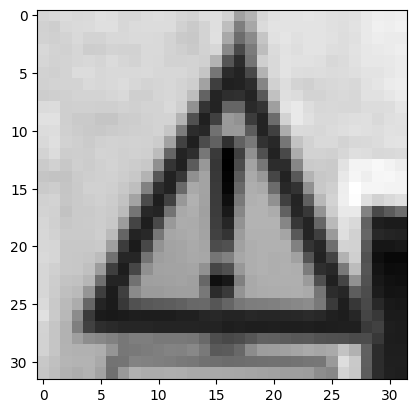

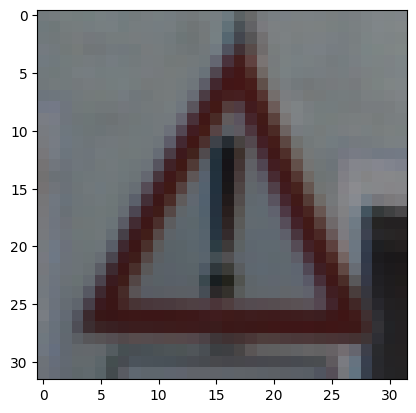

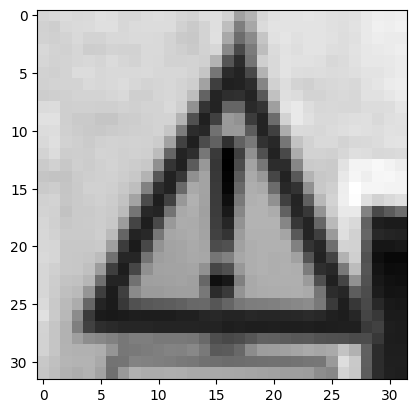

In [ ]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

# **TEORIA Y FUNCIONAMIENTO DE LAS REDES CONVOLUCIONALES**

Las Redes Neuronales Convolucionales (CNN) son un tipo especializado de red neuronal artificial diseñada específicamente para procesar datos de estructura jerárquica, como por ejemplo imágenes. Es la piedra angular de muchos avances en el campo del aprendizaje profundo, especialmente en tareas de visión por computadora, como el reconocimiento de objetos, la clasificación de imágenes y la segmentación semántica. A continuación explicaremos un poco de la teoría y el funcionamiento de las CNN:

![Dropout](https://github.com/DLCBA/CNN/blob/main/recursos/CNN.png?raw=true)

- **Neuronas Convolucionales:**

Las neuronas convolucionales son unidades fundamentales que realizan operaciones de convolución. La convolución implica deslizar una ventana (filtro) sobre la entrada (imagen) y realizar productos escalares entre los pesos del filtro y los valores de píxeles correspondientes en la entrada, permitiendo así, detectar características locales, como bordes, texturas y patrones, en diferentes regiones de la imagen.

- **Capas Convolucionales:**

Simplemente son múltiples neuronas convolucionales que operan de forma simultánea en diferentes partes de la imagen de entrada. Cada capa aplica varios filtros para extraer características específicas de la imagen. Son responsables de aprender representaciones cada vez más abstractas y complejas de los datos de entrada a medida que se profundiza en la red.

- **Capas de Pooling:**

Las capas de pooling se utilizan para `reducir la dimensionalidad` espacial de las representaciones convolucionales, de esta manera ayuda a disminuir el número de parámetros en la red. La operación típica de pooling, como el `Max Pooling`, toma el valor máximo de un grupo de píxeles adyacentes en una región específica, lo que preserva las características principales mientras reduce el tamaño de la representación. **En este proyecto utilizaremos `Average Pooling`.**

- **Capas Fully Connected:**

Luego de atrvesar las convoluciones y el pooling, las representaciones resultantes se aplanan(`Capa Flaten`) y se pasan a una o más capas completamente conectadas. Muy similar a las capas de una red neuronal tradicional y se utilizan para realizar la clasificación final o la regresión en función de las características extraídas anteriomente.

### **Funcionamiento:**

Durante el entrenamiento, una CNN aprende automáticamente los pesos de los filtros y los parámetros de las capas completamente conectadas mediante el algoritmo de retropropagación y el descenso de gradiente estocástico. Se optimiza una función de pérdida para minimizar la diferencia entre las predicciones del modelo y las etiquetas verdaderas de los datos de entrenamiento.

Una de las características distintivas de las CNN es su capacidad para aprender representaciones jerárquicas de las características en los datos de entrada. Las primeras capas aprenden características simples, como bordes y texturas, mientras que las capas más profundas aprenden características más abstractas y complejas, como formas y objetos.

# **CONSTRUCCIÓN DEL MODELO**

In [ ]:
from tensorflow.keras import datasets, layers, models
CNN= models.Sequential()
CNN.add(layers.Conv2D(6, (5,5), activation= "relu", input_shape=(32,32,1)))
CNN.add(layers.AveragePooling2D())
CNN.add(layers.Flatten())
CNN.add(layers.Dense(120, activation= "relu"))
CNN.add(layers.Dense(84, activation= "relu"))
CNN.add(layers.Dense(43, activation= "softmax"))
CNN.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 flatten (Flatten)           (None, 1176)              0         
                                                                 
 dense (Dense)               (None, 120)               141240    
                                                                 
 dense_1 (Dense)             (None, 84)                10164     
                                                                 
 dense_2 (Dense)             (None, 43)                3655      
                                                        

# **COMPILACION Y ENTRENAMIENTO**

In [ ]:
CNN.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics= ["accuracy"])

In [ ]:
history= CNN.fit(X_train_gray_norm,
                y_train,
                batch_size= 500,
                epochs= 50,
                verbose= 1,
                validation_data=(X_valid_gray_norm, y_valid))

Epoch 1/50
70/70 [==============================] - 14s 184ms/step - loss: 3.0085 - accuracy: 0.2306 - val_loss: 2.6465 - val_accuracy: 0.3272
Epoch 2/50
70/70 [==============================] - 12s 168ms/step - loss: 1.6741 - accuracy: 0.5454 - val_loss: 1.6589 - val_accuracy: 0.5265
Epoch 3/50
70/70 [==============================] - 11s 158ms/step - loss: 1.0254 - accuracy: 0.7228 - val_loss: 1.1895 - val_accuracy: 0.6413
Epoch 4/50
70/70 [==============================] - 13s 182ms/step - loss: 0.7422 - accuracy: 0.8023 - val_loss: 1.0043 - val_accuracy: 0.7109
Epoch 5/50
70/70 [==============================] - 12s 174ms/step - loss: 0.5865 - accuracy: 0.8470 - val_loss: 0.9222 - val_accuracy: 0.7331
Epoch 6/50
70/70 [==============================] - 12s 175ms/step - loss: 0.4860 - accuracy: 0.8751 - val_loss: 0.8546 - val_accuracy: 0.7558
Epoch 7/50
70/70 [==============================] - 12s 173ms/step - loss: 0.4191 - accuracy: 0.8946 - val_loss: 0.8163 - val_accuracy: 0.7687

# **EVALUACION DEL MODELO**

In [ ]:
train_loss, train_accuracy = CNN.evaluate(X_train_gray_norm, y_train)
print('Train Loss:', train_loss)
print('Train Accuracy:', train_accuracy)

1088/1088 [==============================] - 11s 10ms/step - loss: 0.0333 - accuracy: 0.9921
Train Loss: 0.033278726041316986
Train Accuracy: 0.9920687079429626


In [ ]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

395/395 [==============================] - 3s 7ms/step - loss: 1.2184 - accuracy: 0.8500
Test Loss: 1.2184109687805176
Test Accuracy: 0.8499603867530823


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

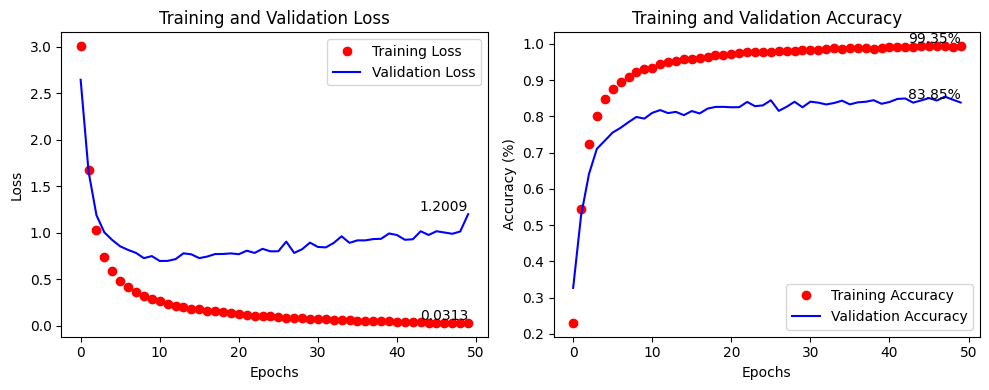

In [ ]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 4)
epochs = range(len(accuracy))
ax[0].plot(epochs, loss, "ro", label="Training Loss")
ax[0].plot(epochs, val_loss, "b", label="Validation Loss")
ax[0].set_title("Training and Validation Loss")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].legend()
ax[0].text(len(loss)-1, loss[-1], f'{loss[-1]:.4f}', ha='right', va='bottom')
ax[0].text(len(val_loss)-1, val_loss[-1], f'{val_loss[-1]:.4f}', ha='right', va='bottom')
ax[1].plot(epochs, accuracy, "ro", label="Training Accuracy")
ax[1].plot(epochs, val_accuracy, "b", label="Validation Accuracy")
ax[1].set_title("Training and Validation Accuracy")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy (%)")  # Seteamos a formato porcentual
ax[1].legend()
ax[1].text(len(accuracy)-1, accuracy[-1], f'{accuracy[-1]*100:.2f}%', ha='right', va='bottom')
ax[1].text(len(val_accuracy)-1, val_accuracy[-1], f'{val_accuracy[-1]*100:.2f}%', ha='right', va='bottom')
plt.tight_layout()
plt.show()

# **TUNING DE HIPERPARAMETROS**

Como se puede comprobar por la salida de las evaluciones el modelo esta sobreajustando, ya que muestra un rendimiento excelente en el conjunto de datos de entrenamiento, con una alta precisión y una baja pérdida, sin embargo, vemos una degradación del rendimiento en el conjunto de datos de prueba.
Es decir que no estaria generalizando adecuamente cuando se le presentan datos nuevos, por lo que intentaremos optimizar el modelo para evitar el **`Overfitting`**.

A modo de prueba comenzaremos agregando tres capas extras, una de **`Convolución`** y una de **`Pooling`**.

```
CNN_t.add(layers.Conv2D(16, (5,5), activation= "relu"))
CNN_t.add(layers.AveragePooling2D())
```

Posteriormente, una vez aplanadas las entradas, aplicaremos la ultima capa extra, siendo esta una de regularización **`Dropout`**
```
CNN_t.add(layers.Dropout(0.2))
```
con la cual intentaremos reducir el **`Overfitting`** registrado en el modelo anterior.

# **DROPOUT**

Debido a que las neuronas logran desarrollar una especie de codependencia durante el entrenamiento, es necesario regularizar este comportamiento, por lo cual se utiliza el metodo **`Dropout`** que consiste en apagar neuronas de manera aleatoria según donde se aplique, si lo hacemos en una capa oculta, se ***eliminan/apagan*** algunas neuronas ocultas, pero si lo hacemos sobre un vector de entrada, lo que esto hace es ***eliminar/apagar*** algunas caracteristicas de dicha entrada.

![Dropout](https://github.com/DLCBA/CNN/blob/main/recursos/Dropout.png?raw=true)

In [ ]:
CNN_t= models.Sequential()
CNN_t.add(layers.Conv2D(6, (5,5), activation= "relu", input_shape=(32,32,1)))
CNN_t.add(layers.AveragePooling2D())
CNN_t.add(layers.Conv2D(16, (5,5), activation= "relu")) # Nueva Capa
CNN_t.add(layers.AveragePooling2D()) # Nueva Capa
CNN_t.add(layers.Flatten())
CNN_t.add(layers.Dropout(0.2)) # Nueva Capa
CNN_t.add(layers.Dense(120, activation= "relu"))
CNN_t.add(layers.Dense(84, activation= "relu"))
CNN_t.add(layers.Dense(43, activation= "softmax"))
CNN_t.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_1 (Avera  (None, 14, 14, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_2 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dropout (Dropout)           (None, 400)              


A continuación, al compilar el modelo, mantendremos la configuración anterior a excepcion de la cantidad de **`epochs`** a entrenar ya que analizando rapidamente las graficas anteriores, vimos que no hay mucha mejoria a medida que aumentamos la cantidad de los mismos.


In [ ]:
CNN_t.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics= ["accuracy"])

In [ ]:
history= CNN_t.fit(X_train_gray_norm,
                y_train,
                batch_size= 500,
                epochs= 25, # Cantidad de epochs modificados
                verbose= 1,
                validation_data=(X_valid_gray_norm, y_valid))

Epoch 1/25
70/70 [==============================] - 17s 223ms/step - loss: 3.1709 - accuracy: 0.1858 - val_loss: 2.5856 - val_accuracy: 0.3683
Epoch 2/25
70/70 [==============================] - 15s 219ms/step - loss: 1.6448 - accuracy: 0.5357 - val_loss: 1.2395 - val_accuracy: 0.6270
Epoch 3/25
70/70 [==============================] - 15s 218ms/step - loss: 0.9450 - accuracy: 0.7240 - val_loss: 0.8758 - val_accuracy: 0.7410
Epoch 4/25
70/70 [==============================] - 15s 218ms/step - loss: 0.7080 - accuracy: 0.7931 - val_loss: 0.7558 - val_accuracy: 0.7787
Epoch 5/25
70/70 [==============================] - 15s 219ms/step - loss: 0.5817 - accuracy: 0.8310 - val_loss: 0.6743 - val_accuracy: 0.8018
Epoch 6/25
70/70 [==============================] - 15s 219ms/step - loss: 0.4907 - accuracy: 0.8601 - val_loss: 0.6062 - val_accuracy: 0.8211
Epoch 7/25
70/70 [==============================] - 15s 219ms/step - loss: 0.4226 - accuracy: 0.8819 - val_loss: 0.5384 - val_accuracy: 0.8478

In [ ]:
train_loss, train_accuracy = CNN_t.evaluate(X_train_gray_norm, y_train)
print('Train Loss:', train_loss)
print('Train Accuracy:', train_accuracy)

1088/1088 [==============================] - 9s 8ms/step - loss: 0.0509 - accuracy: 0.9902
Train Loss: 0.05091755464673042
Train Accuracy: 0.9901721477508545


In [ ]:
score = CNN_t.evaluate(X_test_gray_norm, y_test)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

395/395 [==============================] - 4s 9ms/step - loss: 0.5555 - accuracy: 0.8976
Test Loss: 0.5555259585380554
Test Accuracy: 0.8976247310638428


In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

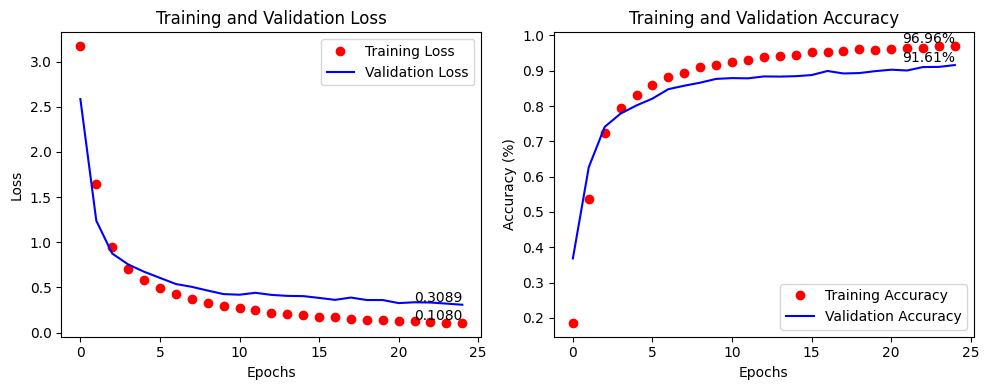

In [ ]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 4)
epochs = range(len(accuracy))
ax[0].plot(epochs, loss, "ro", label="Training Loss")
ax[0].plot(epochs, val_loss, "b", label="Validation Loss")
ax[0].set_title("Training and Validation Loss")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].legend()
ax[0].text(len(loss)-1, loss[-1], f'{loss[-1]:.4f}', ha='right', va='bottom')
ax[0].text(len(val_loss)-1, val_loss[-1], f'{val_loss[-1]:.4f}', ha='right', va='bottom')
ax[1].plot(epochs, accuracy, "ro", label="Training Accuracy")
ax[1].plot(epochs, val_accuracy, "b", label="Validation Accuracy")
ax[1].set_title("Training and Validation Accuracy")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy (%)")  # Seteamos a formato porcentual
ax[1].legend()
ax[1].text(len(accuracy)-1, accuracy[-1], f'{accuracy[-1]*100:.2f}%', ha='right', va='bottom')
ax[1].text(len(val_accuracy)-1, val_accuracy[-1], f'{val_accuracy[-1]*100:.2f}%', ha='right', va='bottom')
plt.tight_layout()
plt.show()

------

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("Best.h5", monitor="val_loss",save_best_only=True, verbose=1)
callbacks = [checkpoint]

In [ ]:

CNN_f = models.Sequential([
    layers.Conv2D(filters=60, kernel_size=(5,5), activation='relu', input_shape=(32,32,1)),
    layers.Conv2D(filters=60, kernel_size=(5,5), activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.BatchNormalization(axis=-1),

    layers.Conv2D(filters=30, kernel_size=(3,3), activation='relu'),
    layers.Conv2D(filters=30, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.BatchNormalization(axis=-1),

    layers.Dropout(rate=0.25),
    layers.Flatten(),
    layers.Dense(500, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.5),

    layers.Dense(43, activation='softmax')
])

In [ ]:
CNN_f.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics= ["accuracy"])

In [ ]:
Augmentation = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=False,
    vertical_flip=False)

history = CNN_f.fit(Augmentation.flow(X_train_gray_norm, y_train, batch_size=500),
                  steps_per_epoch=len(X_train_gray_norm) / 500,
                  epochs=20,
                  verbose=1,
                  validation_data=(X_valid_gray_norm, y_valid),
                  callbacks=callbacks)


Epoch 1/20
70/69 [==============================] - ETA: -2s - loss: 3.0203 - accuracy: 0.2826
Epoch 1: val_loss improved from inf to 3.65613, saving model to Best.h5
69/69 [==============================] - 391s 6s/step - loss: 3.0203 - accuracy: 0.2826 - val_loss: 3.6561 - val_accuracy: 0.0628
Epoch 2/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


70/69 [==============================] - ETA: -2s - loss: 1.3005 - accuracy: 0.6178
Epoch 2: val_loss did not improve from 3.65613
69/69 [==============================] - 387s 6s/step - loss: 1.3005 - accuracy: 0.6178 - val_loss: 5.2779 - val_accuracy: 0.0546
Epoch 3/20
70/69 [==============================] - ETA: -2s - loss: 0.6589 - accuracy: 0.8025
Epoch 3: val_loss did not improve from 3.65613
69/69 [==============================] - 381s 5s/step - loss: 0.6589 - accuracy: 0.8025 - val_loss: 6.2920 - val_accuracy: 0.0544
Epoch 4/20
70/69 [==============================] - ETA: -2s - loss: 0.4050 - accuracy: 0.8792
Epoch 4: val_loss did not improve from 3.65613
69/69 [==============================] - 382s 5s/step - loss: 0.4050 - accuracy: 0.8792 - val_loss: 6.6725 - val_accuracy: 0.0544
Epoch 5/20
70/69 [==============================] - ETA: -2s - loss: 0.2802 - accuracy: 0.9171
Epoch 5: val_loss did not improve from 3.65613
69/69 [==============================] - 374s 5s/step

In [ ]:
train_loss, train_accuracy = CNN_f.evaluate(X_train_gray_norm, y_train)
print('Train Loss:', train_loss)
print('Train Accuracy:', train_accuracy)

1088/1088 [==============================] - 101s 92ms/step - loss: 0.0090 - accuracy: 0.9972
Train Loss: 0.009044894017279148
Train Accuracy: 0.9971550703048706


In [ ]:
score = CNN_f.evaluate(X_test_gray_norm, y_test)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

395/395 [==============================] - 39s 99ms/step - loss: 0.1512 - accuracy: 0.9611
Test Loss: 0.15119057893753052
Test Accuracy: 0.9611243009567261


In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

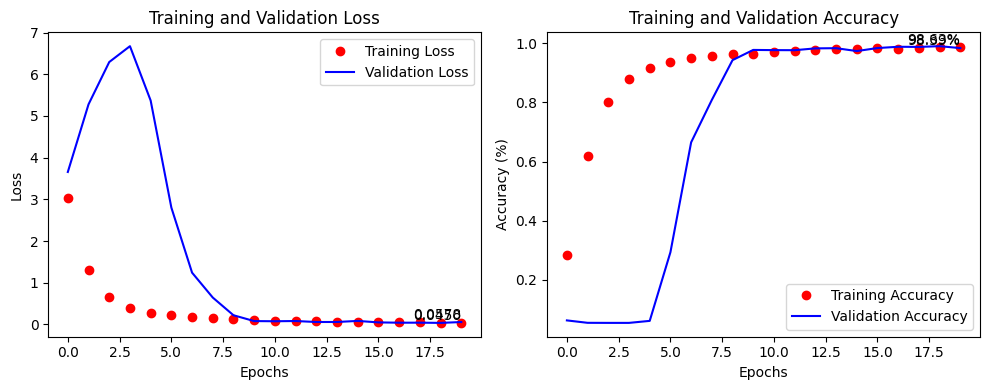

In [ ]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 4)
epochs = range(len(accuracy))
ax[0].plot(epochs, loss, "ro", label="Training Loss")
ax[0].plot(epochs, val_loss, "b", label="Validation Loss")
ax[0].set_title("Training and Validation Loss")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].legend()
ax[0].text(len(loss)-1, loss[-1], f'{loss[-1]:.4f}', ha='right', va='bottom')
ax[0].text(len(val_loss)-1, val_loss[-1], f'{val_loss[-1]:.4f}', ha='right', va='bottom')
ax[1].plot(epochs, accuracy, "ro", label="Training Accuracy")
ax[1].plot(epochs, val_accuracy, "b", label="Validation Accuracy")
ax[1].set_title("Training and Validation Accuracy")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy (%)")  # Seteamos a formato porcentual
ax[1].legend()
ax[1].text(len(accuracy)-1, accuracy[-1], f'{accuracy[-1]*100:.2f}%', ha='right', va='bottom')
ax[1].text(len(val_accuracy)-1, val_accuracy[-1], f'{val_accuracy[-1]*100:.2f}%', ha='right', va='bottom')
plt.tight_layout()
plt.show()

In [ ]:
sns.set_style("whitegrid")

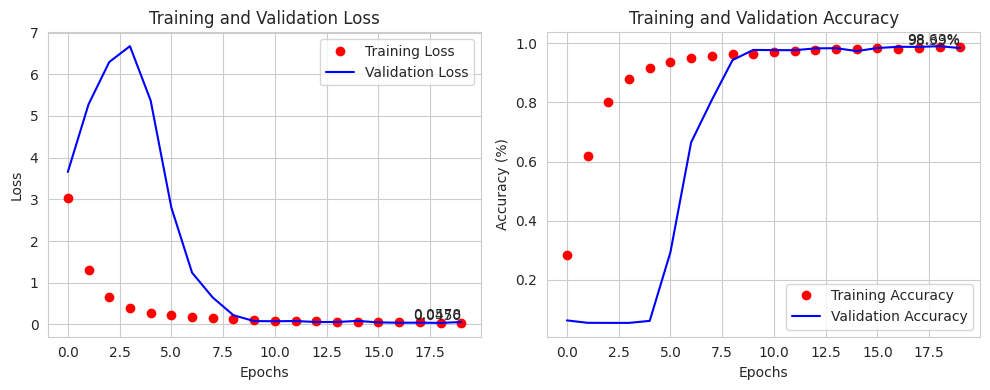

In [ ]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 4)
ax[0].plot(epochs, loss, "ro", label="Training Loss")
ax[0].plot(epochs, val_loss, "b", label="Validation Loss")
ax[0].set_title("Training and Validation Loss")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].legend()
ax[0].text(len(loss)-1, loss[-1], f'{loss[-1]:.4f}', ha='right', va='bottom')
ax[0].text(len(val_loss)-1, val_loss[-1], f'{val_loss[-1]:.4f}', ha='right', va='bottom')
ax[1].plot(epochs, accuracy, "ro", label="Training Accuracy")
ax[1].plot(epochs, val_accuracy, "b", label="Validation Accuracy")
ax[1].set_title("Training and Validation Accuracy")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy (%)")  # Seteamos a formato porcentual
ax[1].legend()
ax[1].text(len(accuracy)-1, accuracy[-1], f'{accuracy[-1]*100:.2f}%', ha='right', va='bottom')
ax[1].text(len(val_accuracy)-1, val_accuracy[-1], f'{val_accuracy[-1]*100:.2f}%', ha='right', va='bottom')
plt.tight_layout()
plt.show()

In [ ]:
!pip install plotly

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
epochs_list = list(epochs)
training_loss_label = f'Training Loss ({loss[-1]:.4f})'
validation_loss_label = f'Validation Loss ({val_loss[-1]:.4f})'
training_accuracy_label = f'Training Accuracy ({accuracy[-1]*100:.2f}%)'
validation_accuracy_label = f'Validation Accuracy ({val_accuracy[-1]*100:.2f}%)'
fig = make_subplots(rows=1, cols=2, subplot_titles=("Training and Validation Loss", "Training and Validation Accuracy"))
fig.update_layout(width=1200, height=500)
fig.add_trace(go.Scatter(x=epochs_list, y=loss, mode='lines+markers', name=training_loss_label, marker=dict(color='red')),
              row=1, col=1)
fig.add_trace(go.Scatter(x=epochs_list, y=val_loss, mode='lines+markers', name=validation_loss_label, marker=dict(color='blue')),
              row=1, col=1)
fig.update_xaxes(title_text="Epochs", row=1, col=1)
fig.update_yaxes(title_text="Loss", row=1, col=1)
fig.add_trace(go.Scatter(x=epochs_list, y=accuracy, mode='lines+markers', name=training_accuracy_label, marker=dict(color='red')),
              row=1, col=2)
fig.add_trace(go.Scatter(x=epochs_list, y=val_accuracy, mode='lines+markers', name=validation_accuracy_label, marker=dict(color='blue')),
              row=1, col=2)
fig.update_xaxes(title_text="Epochs", row=1, col=2)
fig.update_yaxes(title_text="Accuracy (%)", row=1, col=2)
fig.show()

395/395 [==============================] - 37s 94ms/step


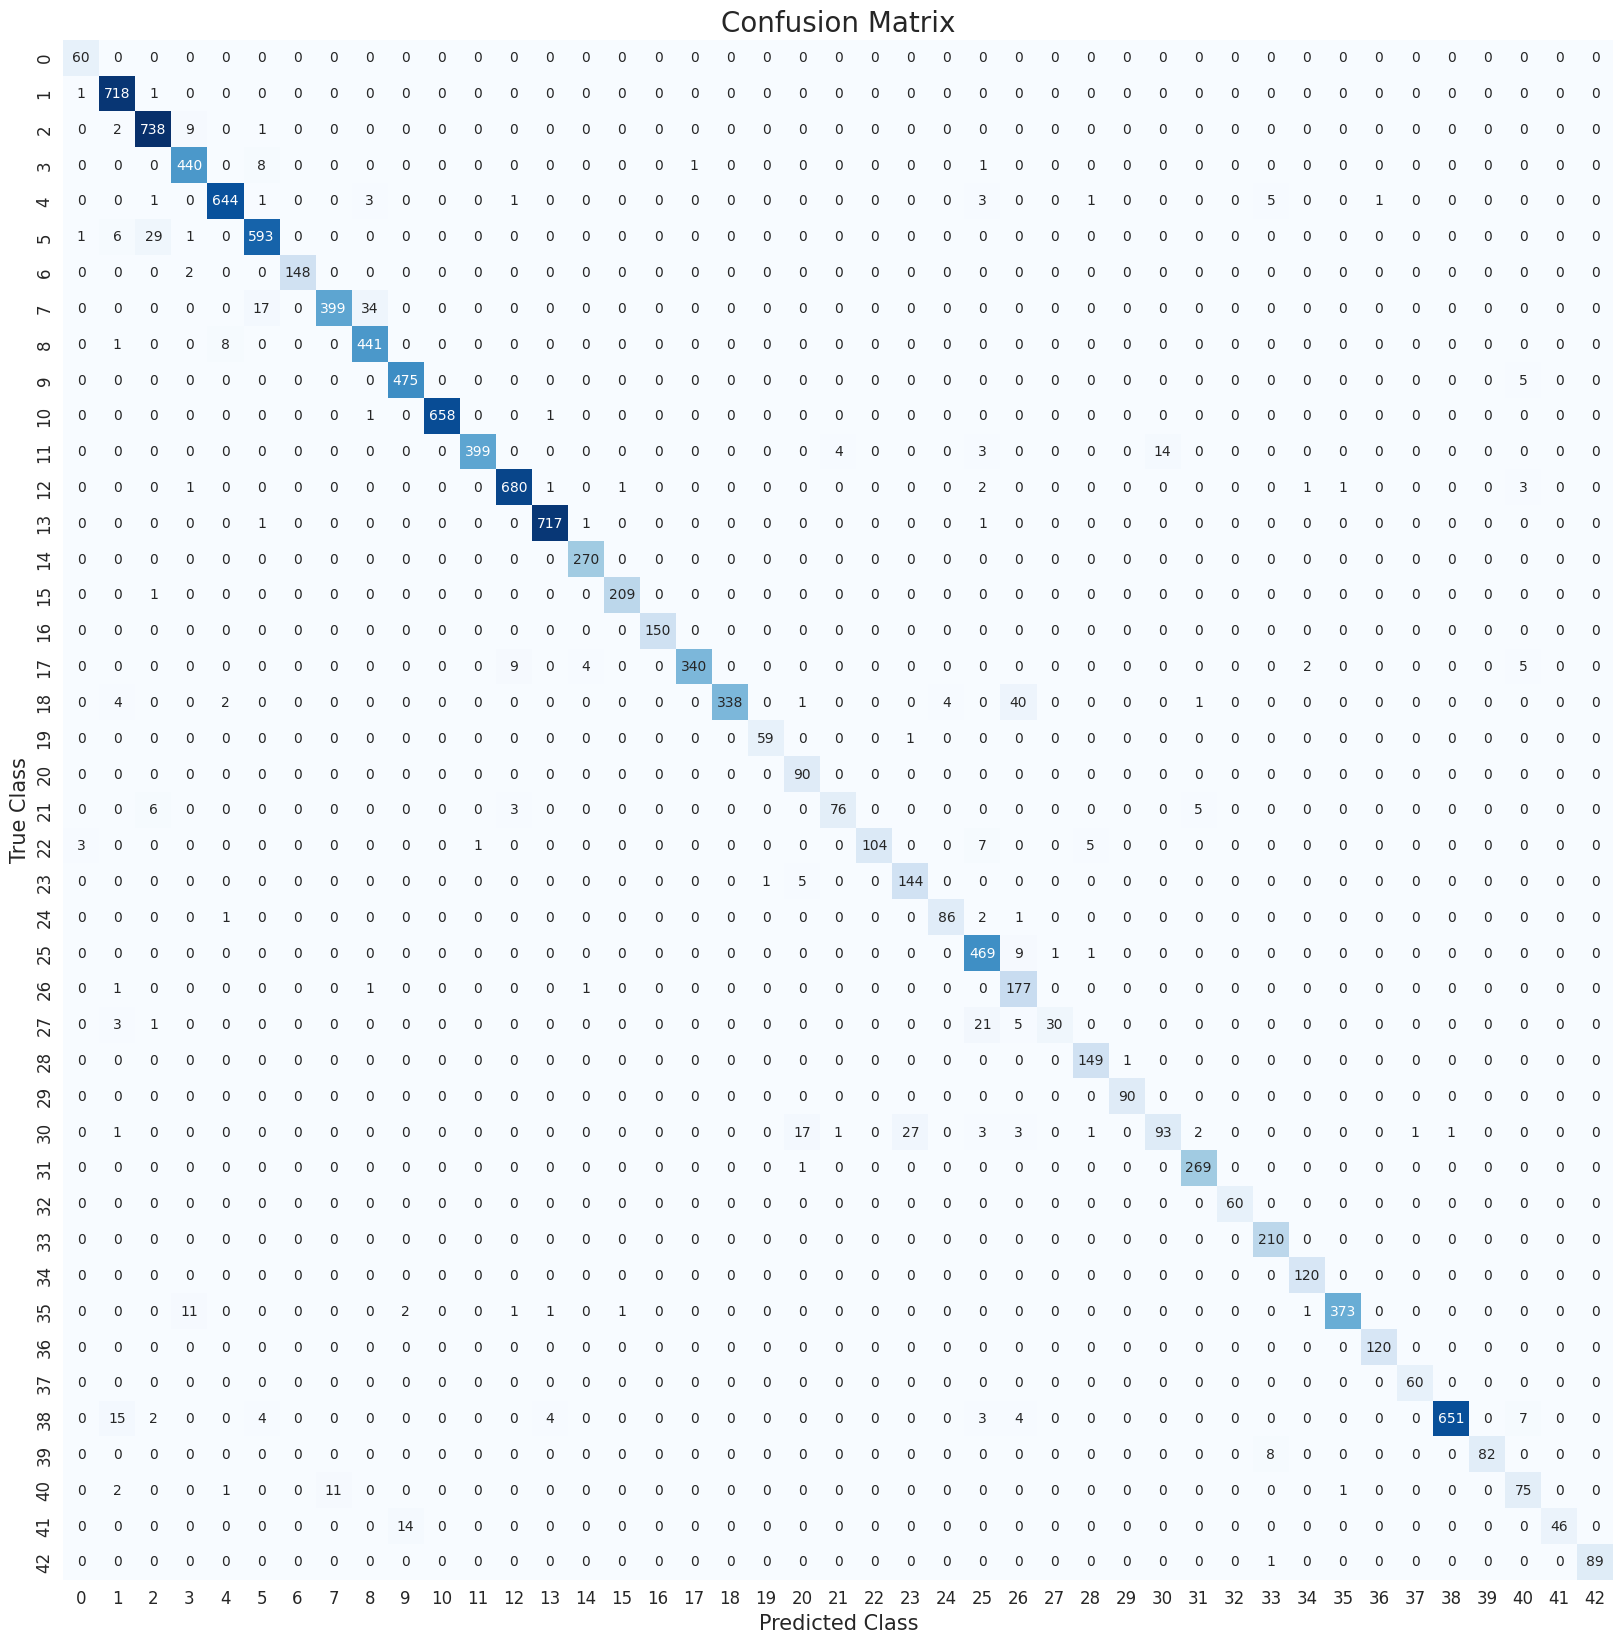

In [ ]:
from sklearn.metrics import confusion_matrix
# Obtener las predicciones de clases
predicted_probabilities = CNN_f.predict(X_test_gray_norm)

# Convertir las probabilidades en clases numéricas
predicted_classes = np.argmax(predicted_probabilities, axis=1)

y_true = y_test

# Crear la matriz de confusión
cm = confusion_matrix(y_true, predicted_classes)

# Mejorar la visualización de la matriz de confusión
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=range(len(np.unique(y_true))),
            yticklabels=range(len(np.unique(y_true))))
plt.title('Confusion Matrix', fontsize=20)
plt.xlabel('Predicted Class', fontsize=15)
plt.ylabel('True Class', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

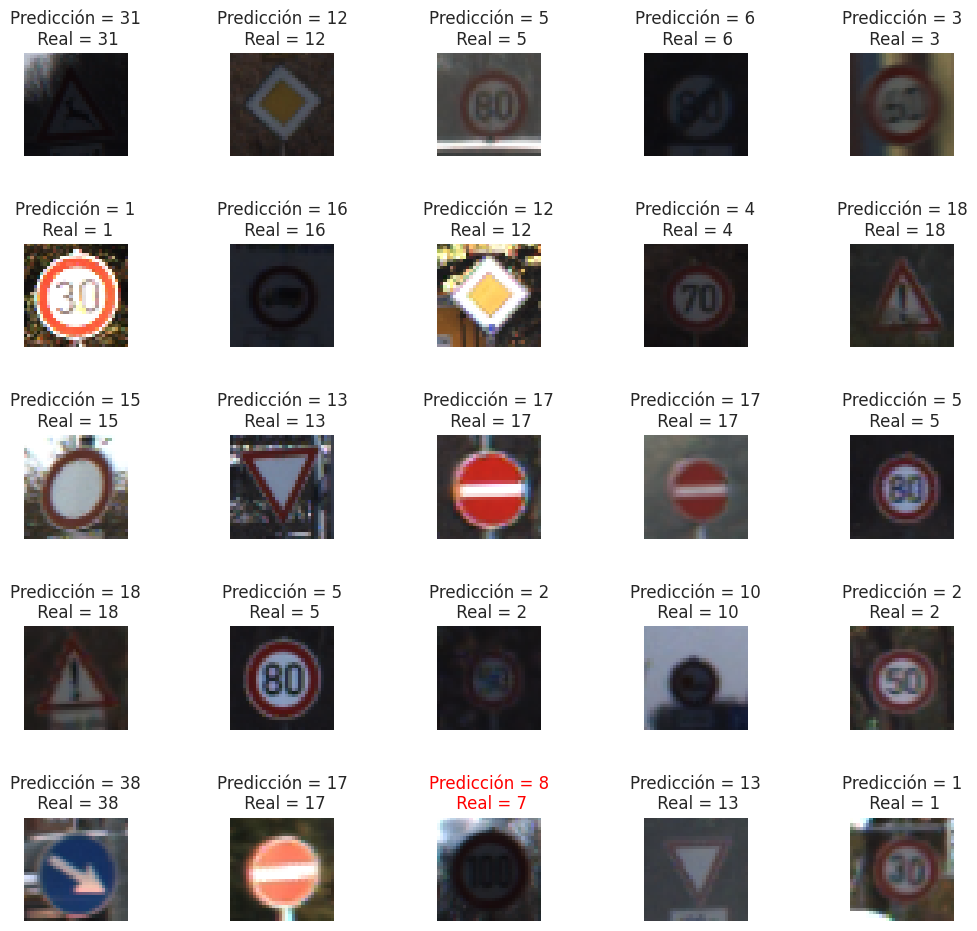

In [ ]:
L = 5
A = 5

fig, axes = plt.subplots(L, A, figsize=(12, 12))
axes = axes.ravel()

for i in range(L * A):
    # Seleccionar un índice aleatorio
    random_index = random.randint(0, len(X_test) - 1)
    axes[i].imshow(X_test[random_index])  # Mostrar el ejemplo aleatorio
    if predicted_classes[random_index] != y_true[random_index]:
        axes[i].set_title('Predicción = {}\n Real = {}'.format(predicted_classes[random_index], y_true[random_index]), color='red')
    else:
        axes[i].set_title('Predicción = {}\n Real = {}'.format(predicted_classes[random_index], y_true[random_index]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)
plt.show()

# **APENDICE**

- Las clases son las siguientes:
  - 0 = Límite de velocidad (20km/h)
  - 1 = Límite de velocidad (30km/h)
  - 2 = Límite de velocidad (50km/h)
  - 3 = Límite de velocidad (60km/h)
  - 4 = Límite de velocidad (70km/h)
  - 5 = Límite de velocidad (80km/h)
  - 6 = Fin de límite de velocidad (80km/h)
  - 7 = Límite de velocidad (100km/h)
  - 8 = Límite de velocidad (120km/h)
  - 9 = Prohibido adelantar
  - 10 = Prohibido adelantar a camiones
  - 11 = Intersección prioritaria
  - 12 = Carretera con prioridad
  - 13 = Ceder el paso
  - 14 = Pare
  - 15 = Prohibido el paso
  - 16 = Prohibido el paso a camiones
  - 17 = Prohibido el paso en sentido contrario
  - 18 = Peligro general
  - 19 = Curva peligrosa a la izquierda
  - 20 = Curva peligrosa a la derecha
  - 21 = Doble curva
  - 22 = Camino con baches
  - 23 = Camino resbaladizo
  - 24 = Calzada estrecha a la derecha
  - 25 = Obras
  - 26 = Semáforo
  - 27 = Paso de peatones
  - 28 = Paso de niños
  - 29 = Cruce de bicicletas
  - 30 = Cuidado con hielo/nieve
  - 31 = Cuidado con los animales
  - 32 = Fin de todas las restricciones
  - 33 = Sentido obligatorio a la derecha
  - 34 = Sentido obligatorio a la izquierda
  - 35 = Sentido obligatorio recto
  - 36 = Sentido obligatorio recto o derecha
  - 37 = Sentido obligatorio recto o izquierda
  - 38 = Mantenerse a la derecha
  - 39 = Mantenerse a la izquierda
  - 40 = Rótonda obligatoria
  - 41 = Fin de prohibición de adelantar
  - 42 = Fin de prohibición de adelantar a camiones

# **Resultados Esperados:**

Se espera que el modelo final pueda reconocer con alta precisión una amplia variedad de señales de tráfico en diferentes escenarios y condiciones. Los resultados se validarán mediante pruebas rigurosas utilizando métricas de rendimiento estándar en clasificación de imágenes, como la precisión, la exhaustividad y la matriz de confusión.

# **Aplicaciones Potenciales:**

El modelo entrenado podría integrarse en sistemas de asistencia al conductor, sistemas de navegación y vehículos autónomos para mejorar la seguridad vial y la experiencia de conducción. Además, podría ser útil en aplicaciones de vigilancia urbana y gestión del tráfico.

# **Conclusiones:**

El desarrollo de un modelo preciso de reconocimiento de señales de tráfico utilizando CNN representa un avance significativo en la seguridad vial y la conducción autónoma. Este proyecto tiene el potencial de **salvar vidas, reducir accidentes de tráfico y mejorar la eficiencia del transporte en general**.


- Referencias

J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011.

@inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }